<font color='#867070' size=10><center><u>📌Dummy Variables & One Hot Encoding in ML📌</u></center> </font>

<a id="TOC"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#867070; border:0; color:white' role="tab" aria-controls="home"><center>Table of Content 📝</center></h1>
    
✒️ [Introduction](#introduction)
    
✒️ [Categorical Variables](#introduction)
    
✒️ [Libraries](#libraries)
    
✒️ [Loading Data](#data)
    
✒️ [Dummy variables](#dummyvariable)
    
✒️ [Dummy Variable Trap](#dummytrap)
    
✒️ [OneHotEncoder](#onehotencoder)


<a id="introduction"></a>
<h1 style='background:#867070; border:0; color:white'><center>Introduction</center><h1>

So here build a predictor function to predict price of a home
1. with 3400 sqft area in westwindsor
2. 2800 sqft home in robbinsville


When We look at the data 

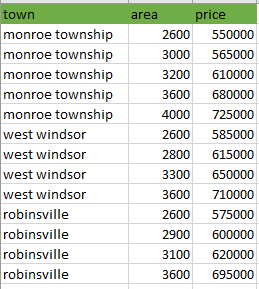

Here in town column there is text data. Then How should we handle text data in neumeric model?

So one way to do this is Interger encoding or label encoding where we convert name of the town into specific integer number like below

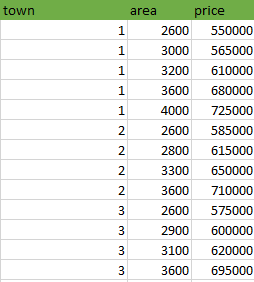

But there is a problem with that, just think we are assigning numbers to these township and when we give this to our model which is working on the number, it will assumes the orders and it will make assumptiion such as -

# monroe township < west windsor < robinsville

# Or

# monroe township + west windsor = robinsville

This doesn't quite make sense. These variable are called categorical variable. Categorical variable are 2 types. Here is given below- 

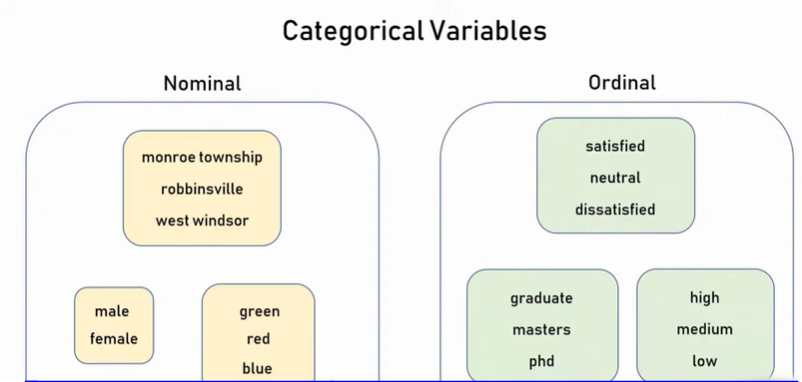

## What is Nominal Data? 
Nominal data is defined as data that is used for naming or labeling variables, without any quantitative value. It is sometimes called “named” data – a meaning coined from the word nominal. 

## What is Ordinal Data?  
Ordinal data is a type of categorical data with an order. The variables in ordinal data are listed in an ordered manner. The ordinal variables are usually numbered, so as to indicate the order of the list. However, the numbers are not mathematically measured or determined but are merely assigned as labels for opinions.

Here integer encoding is not going to work. Hence we are now going to use One Hot Encoding.

One hot encoding works is we create a new column for each of your categories and assign binary value of one or zero. Like this- 

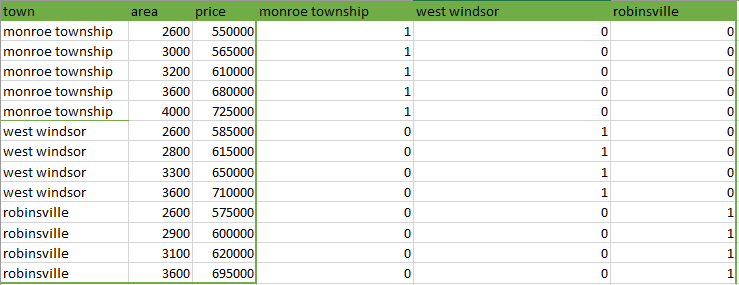

Here these extra variable are created they are called dummy variable

## Let's get into the code

<a id="libraries"></a>
<h1 style='background:#867070; border:0; color:white'><center>Libraries</center></h1>

<a href="#TOC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [1]:
import pandas as pd
import numpy as np

<a id="data"></a>
<h1 style='background:#867070; border:0; color:white'><center>Load Data</center></h1>

<a href="#TOC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [2]:
df = pd.read_csv("../input/homepricedata/homeprices.csv")

In [3]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


<a id="dummyvariable"></a>
<h1 style='background:#867070; border:0; color:white'><center>Using pandas to create dummy variables</center></h1>

<a href="#TOC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

In [4]:
dummies = pd.get_dummies(df.town)

In [5]:
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


### Using concat() method to join two columns

In [6]:
merged = pd.concat([df, dummies], axis = 'columns')

In [7]:
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


Here as we have dummy variables columns so we don't need town column anymore because that's not gonna work in linear regression model so we drop this column after we are done dropping this the second thing we need to do one of the dummy variables column. But why do we need to do this?
At first we need to know about dummy variable trap and whenever one variable can be derived from rest of the variables these said to be multi-co-linear and whenever we have multi-colinearity in our dataset it creates the problem of dummy variable trap that can mess up our machine learning model, hence the rule is drop one of the dummy variables columns. Here we have 3 dummy variables and so we drop one of them. We can pick anyone of them. Here we will drop 'west windsor' column

In [8]:
final = merged.drop(['town'], axis = 'columns')

In [9]:
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


<a id="dummytrap"></a>
<h1 style='background:#867070; border:0; color:white'><center>Dummy Variable Trap</center></h1>

<a href="#TOC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

The Dummy variable trap is a scenario where there are attributes that are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one-hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models leads to a dummy variable trap. So, the regression models should be designed to exclude one dummy variable. 

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [10]:
final = final.drop(['west windsor'], axis = 'columns')

In [11]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [12]:
X = final.drop('price', axis='columns')

In [13]:
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [14]:
y = final.price

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [18]:
model.score(X,y)

0.9573929037221872

In [19]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([681241.66845839])

In [20]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([590775.63964739])

<a id="onehotencoder"></a>
<h1 style='background:#867070; border:0; color:white'><center>sklearn OneHotEncoder</center></h1>

<a href="#TOC" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a>

First step is to use label encoder to convert town names into numbers

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [23]:
X = dfle[['town','area']].values

In [24]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [25]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

### Now use one hot encoder to create dummy variables for each of the town

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [27]:
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [28]:
X = X[:,1:]

In [29]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [30]:
model.fit(X,y)

LinearRegression()

In [31]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [32]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

**Ref:**
* https://www.formpl.us/blog/nominal-ordinal-data

* https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/

* https://www.educative.io/blog/one-hot-encoding

* https://www.youtube.com/watch?v=9yl6-HEY7_s&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=8

* https://scikit-learn.org/stable/